In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import matplotlib as mpl
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False
%matplotlib inline

In [32]:
import sklearn

In [33]:
np.version.version,tf.__version__,sklearn.__version__

('1.18.5', '2.5.0', '0.21.3')

In [2]:
df = pd.read_csv("discharge.csv")

In [3]:
df = df[df['Battery'] == 'B0005']
df

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005
...,...,...,...,...,...,...,...,...,...,...,...,...
45117,2.855064,-2.012702,40.404733,1.9982,1.910,2345.875,1.325079,168,discharge,24,2008.0,B0005
45118,2.818475,-2.013183,40.406072,1.9982,1.878,2355.406,1.325079,168,discharge,24,2008.0,B0005
45119,2.774912,-2.011141,40.486980,1.9982,1.840,2364.875,1.325079,168,discharge,24,2008.0,B0005
45120,2.721142,-2.014372,40.695235,1.9982,1.794,2374.468,1.325079,168,discharge,24,2008.0,B0005


In [4]:
df[df['id_cycle']==1]

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005
...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.013061,-2.011095,38.133255,1.9982,2.125,3268.328,1.856487,1,discharge,24,2008.0,B0005
174,2.949205,-2.014217,38.303031,1.9982,2.068,3287.969,1.856487,1,discharge,24,2008.0,B0005
175,2.866018,-2.010609,38.476446,1.9982,1.998,3307.625,1.856487,1,discharge,24,2008.0,B0005
176,2.757252,-2.014112,38.668604,1.9984,1.906,3327.234,1.856487,1,discharge,24,2008.0,B0005


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A22130B908>,
      dtype=object)

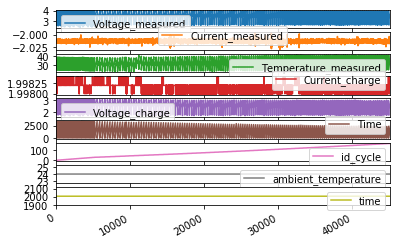

In [5]:

df.drop('Capacity',axis=1).plot(subplots=True)


In [6]:
dfb = df.drop(['type','Time','time','Battery'], axis=1)
dfb

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Capacity,id_cycle,ambient_temperature
0,3.974871,-2.012528,24.389085,1.9982,3.062,1.856487,1,24
1,3.951717,-2.013979,24.544752,1.9982,3.030,1.856487,1,24
2,3.934352,-2.011144,24.731385,1.9982,3.011,1.856487,1,24
3,3.920058,-2.013007,24.909816,1.9982,2.991,1.856487,1,24
4,3.907904,-2.014400,25.105884,1.9982,2.977,1.856487,1,24
...,...,...,...,...,...,...,...,...
45117,2.855064,-2.012702,40.404733,1.9982,1.910,1.325079,168,24
45118,2.818475,-2.013183,40.406072,1.9982,1.878,1.325079,168,24
45119,2.774912,-2.011141,40.486980,1.9982,1.840,1.325079,168,24
45120,2.721142,-2.014372,40.695235,1.9982,1.794,1.325079,168,24


In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dfb)
scaled_data

array([[0.97187797, 0.49187898, 0.06351463, ..., 1.        , 0.        ,
        0.        ],
       [0.95706545, 0.44880548, 0.07212878, ..., 1.        , 0.        ,
        0.        ],
       [0.94595697, 0.5329841 , 0.08245648, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.20422385, 0.53305989, 0.95432343, ..., 0.0661239 , 1.        ,
        0.        ],
       [0.16982564, 0.43714592, 0.96584767, ..., 0.0661239 , 1.        ,
        0.        ],
       [0.1277542 , 0.47466295, 0.97573493, ..., 0.0661239 , 1.        ,
        0.        ]])

In [8]:
features = scaled_data
target = scaled_data[:,5]


In [9]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=32)[0]


(array([[[0.97187797, 0.49187898, 0.06351463, 0.5       , 0.99566474,
          1.        , 0.        , 0.        ],
         [0.95706545, 0.44880548, 0.07212878, 0.5       , 0.97254335,
          1.        , 0.        , 0.        ]],
 
        [[0.95706545, 0.44880548, 0.07212878, 0.5       , 0.97254335,
          1.        , 0.        , 0.        ],
         [0.94595697, 0.5329841 , 0.08245648, 0.5       , 0.95881503,
          1.        , 0.        , 0.        ]],
 
        [[0.94595697, 0.5329841 , 0.08245648, 0.5       , 0.95881503,
          1.        , 0.        , 0.        ],
         [0.93681259, 0.47768072, 0.09233032, 0.5       , 0.94436416,
          1.        , 0.        , 0.        ]],
 
        [[0.93681259, 0.47768072, 0.09233032, 0.5       , 0.94436416,
          1.        , 0.        , 0.        ],
         [0.92903667, 0.43632919, 0.10318012, 0.5       , 0.93424855,
          1.        , 0.        , 0.        ]],
 
        [[0.92903667, 0.43632919, 0.10318012, 0.5   

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42, shuffle=False)

In [11]:
X_train.shape

(38353, 8)

In [22]:
window_length = 178*2
batch_size = 32
num_features = X_train.shape[1]
train_gen = TimeseriesGenerator(X_train, y_train, length=window_length, sampling_rate=1, batch_size=32)
test_gen = TimeseriesGenerator(X_test, y_test, length=window_length, sampling_rate=1, batch_size=32)


In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (window_length,num_features), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 356, 128)          70144     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 356, 128)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 356, 128)          131584    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 356, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 356, 128)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=2,
                                                 mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer = tf.optimizers.Adam(),
            metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_gen,epochs=100,
                             validation_data=test_gen,
                             shuffle=False,
                             callbacks=[early_stopping])

In [ ]:
model.evaluate_generator(test_gen,verbose = 0)

In [ ]:
preds = model.predict_generator(test_gen)

In [ ]:
df_preds = pd.concat([pd.DataFrame(preds),pd.DataFrame(x_test[:,1:][window_length:])], axis=1)

In [ ]:
rev_transform = scaler.inverse_transform(df_preds)

In [ ]:
df_final = df_input[preds.shape[0]*-1:]

In [ ]:
df_final['Capacity_pred'] = rev_trans[:,0]

In [ ]:
df_final[['Capacity_pred','Capacity']].plot()